# import package

In [1]:
import sys
import logging
import os
from tkinter import W
# 把当前文件所在文件夹的父文件夹路径加入到PYTHONPATH
sys.path.append("D:\Tsinghua\Biooptics\K-wave\k-wave-python-master\k-wave-python-master")
from kwave.kgrid import kWaveGrid
from numpy.fft import fftshift,fftn,ifftn,ifftshift
from scipy.interpolate import interp2d
from kwave.utils.interputils import interpolate2D
import numpy as np
import scipy.io as scio
from scipy.io import savemat
import matplotlib.pyplot as plt
import cv2


In [14]:
filepath = "D:\Tsinghua\Biooptics/linear_array/data/linear/1.mat"
data = scio.loadmat(filepath)
sinogram = data['linear']
sinogram = np.concatenate((np.flip(sinogram,1),sinogram[:,1:]),axis=1)
Ny,Nt = sinogram.shape
c = 1500 #sound speed
dt = 2e-8
dy = 1e-4 #换能器间隔
kgrid =  kWaveGrid([Ny,  Nt], [dt ,dt*c])
w = np.complex128(c*kgrid.kx)
w_new = kgrid.k*c
c0 = np.complex128(kgrid.ky)
sf = np.zeros((Ny,Nt), dtype=complex)
sf = (c**2)*((np.sqrt((w/c)**2-c0**2)))/(2*w)
sf[(w==0) ] = c/2
p = np.zeros((Ny,Nt), dtype=complex)
p = sf*fftshift(fftn(ifftshift(sinogram)))
p[np.abs(w)<np.abs(c*kgrid.ky)]=0
p = interpolate2D([w,kgrid.ky],p,[kgrid.kx,kgrid.ky])
p = np.nan_to_num(p,nan=0)
p = np.real(fftshift(ifftn(ifftshift(p))))
p = 2 * 2 * p / c;

savemat('d1.mat',{'p1':p,'kx':kgrid.kx,'k':kgrid.k,'s':sinogram,'sf1':sf})

C:\Users\13987\AppData\Local\Temp\ipykernel_14984\4007094421.py:14: RuntimeWarning: divide by zero encountered in true_divide
  sf = (c**2)*((np.sqrt((w/c)**2-c0**2)))/(2*w)
C:\Users\13987\AppData\Local\Temp\ipykernel_14984\4007094421.py:14: RuntimeWarning: invalid value encountered in true_divide
  sf = (c**2)*((np.sqrt((w/c)**2-c0**2)))/(2*w)


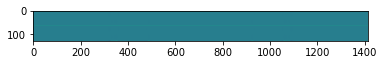

In [16]:
plt.imshow(p)
plt.show()


In [20]:
filepath = "D:\Tsinghua\Biooptics/linear_array/data/linear/1.mat"
data = scio.loadmat(filepath)
sinogram = data['linear']
c = 1500 #sound speed
dt = 2e-8
dy = 1e-4 #换能器间隔
sinogram = np.concatenate((np.flip(sinogram,0),sinogram[1:,:]))
Nt,Ny = sinogram.shape
kgrid = kWaveGrid([Nt,  Ny], [dt*c ,dy])
w = np.complex128(c*kgrid.kx)
w_new = kgrid.k*c
c0 = np.complex128(kgrid.ky)
sf = np.zeros((Nt,Ny), dtype=complex)
sf = (c**2)*((np.sqrt((w/c)**2-c0**2)))/(2*w)
p = np.nan_to_num(p,nan=c/2)
p = np.zeros((Nt,Ny), dtype=complex)
p = sf*fftshift(fftn(ifftshift(sinogram)))
p[np.abs(w)<np.abs(c*kgrid.ky)]=0
p = interpolate2D([w,kgrid.ky],p,[kgrid.kx,kgrid.ky])
p = np.nan_to_num(p,nan=0)
p = np.real(fftshift(ifftn(ifftshift(p))))
p = 2 * 2 * p / c;


C:\Users\13987\AppData\Local\Temp\ipykernel_14984\3484892836.py:14: RuntimeWarning: divide by zero encountered in true_divide
  sf = (c**2)*((np.sqrt((w/c)**2-c0**2)))/(2*w)
C:\Users\13987\AppData\Local\Temp\ipykernel_14984\3484892836.py:14: RuntimeWarning: invalid value encountered in true_divide
  sf = (c**2)*((np.sqrt((w/c)**2-c0**2)))/(2*w)


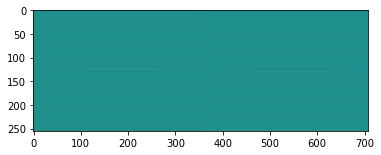

In [19]:
plt.imshow(p)